In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Information about the columns:
    Rounds - Amount of rounds player played.
    ACS - is an abbreviation of "Average Combat Score." 
    ACS defines a player's overall performance which includes kills, assists, deaths, ability usage, first blood, damage, economic awareness and much more.
    K/D - Kill / Death ratio
    ADR - an Average Damage per Round
    KPR - an Average Kills per Round
    DPR - an Average Deaths per Round
    APR - an Average Assists per Round
    FBPR - an Average First Bloods per Round
    FDPR - an Average First Deaths per Round
    HS% - Headshot Percentage (Amount of your shots landed to the head)
    FBSR - First Blood Success Rate

## We will try to answer the following questions about the data:
    1. Which region has the most players base?
    2. Find the average of each metric for future analysis
    3. What is the correlation between metrics?
    4. At what metric each country is good at?
    5. Who's top 10 performers based on both rating and KDR?
    6. Does HS% and KDR relation follow linear regression?



In [46]:
#First we need to import our data
df = pd.read_csv('valorant_stats.csv', sep=',')

In [47]:
df['HS%'].head()
#Need to remove percentage sign to perform math operations on this column
#And we need to do the same with FBSR column

0    35%
1    17%
2    24%
3    22%
4    18%
Name: HS%, dtype: object

In [48]:
df['HS%'] = df['HS%'].str.replace('%', '').astype(int)
df['FBSR'] = df['FBSR'].str.replace('%', '').astype(int)

In [49]:
df.isnull().sum()
#Since we have a clean data right right away we can start our analysis

Player     0
Country    0
Rounds     0
Rating     0
ACS        0
K/D        0
ADR        0
KPR        0
DPR        0
APR        0
FBPR       0
FDPR       0
HS%        0
FBSR       0
dtype: int64

## 1.Which region has the most players base?

In [50]:
player_by_country = df.groupby(['Country'])['Player'].count().sort_values(ascending=False).head(10)
no_of_player = list(player_by_country)

Since there too many countries showing all of them would mess our space, lets show only the top 10.

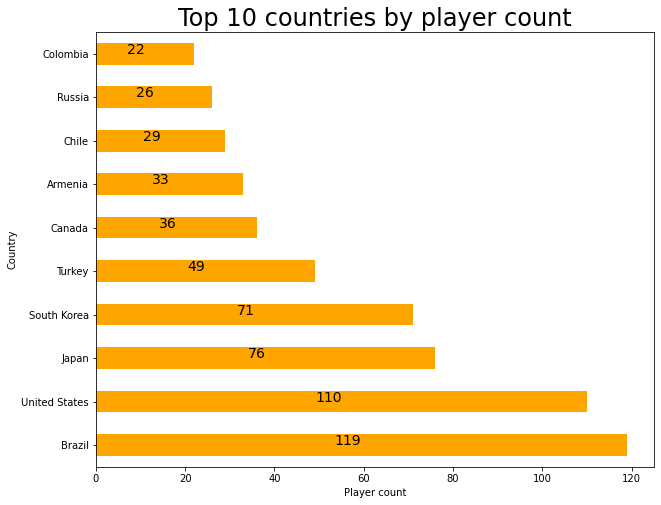

In [51]:
plt.figure(figsize=(10, 8))
player_by_country.plot(kind='barh', color='orange')
plt.title('Top 10 countries by player count', fontdict={'fontsize': 24})
plt.ylabel('Country')
plt.xlabel('Player count')
for i in range(len(no_of_player)):
    plt.annotate(no_of_player[i], (no_of_player[i]/2, i), fontsize=14, ha='right')
plt.show()




We can see that Valorant popular across both North and South Americas. And it makes sense, because Valorant competitor(Counter Strike Global Offensive) had a lot of issues in competetive e-sports scene. It was due to multiple reasons:
  * There is no big tournaments.
  * Companies stopped investing into organisations(If there is no tournaments - there is no viewship, not many people will see Your brand).
  * Not many up and coming players that could reach top results to boost region.

### 2.Find the average of each metric


In [52]:
df.mean()

C:\Users\stren\AppData\Local\Temp/ipykernel_8376/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Rounds    3031.060109
Rating       1.060451
ACS        213.547131
K/D          1.102527
ADR        137.048087
KPR          0.745014
DPR          0.677978
APR          0.264508
FBPR         0.109016
FDPR         0.094508
HS%         23.210383
FBSR        53.090164
dtype: float64

#### Key takeaways on average:
  * 3031 round which is 100+ maps played
  * Positive rating and K/D
  * ADR of 137 (Every player has max HitPoints at 150) so almost 1 kill per round
  * KDR of 0.745 which proves the previous point
  * HS% of 23.2 which is quite low. I expected much higher results

## 3. What is the corellation between metrics?

In [53]:
corr = df.corr()
print(corr)

          Rounds    Rating       ACS       K/D       ADR       KPR       DPR  \
Rounds  1.000000  0.253147  0.168469  0.280111  0.148507  0.197477 -0.226553   
Rating  0.253147  1.000000  0.909228  0.879704  0.889345  0.914826 -0.114205   
ACS     0.168469  0.909228  1.000000  0.812675  0.963560  0.974728  0.138971   
K/D     0.280111  0.879704  0.812675  1.000000  0.790533  0.867688 -0.424502   
ADR     0.148507  0.889345  0.963560  0.790533  1.000000  0.933659  0.110831   
KPR     0.197477  0.914826  0.974728  0.867688  0.933659  1.000000  0.072095   
DPR    -0.226553 -0.114205  0.138971 -0.424502  0.110831  0.072095  1.000000   
APR     0.049000 -0.100792 -0.333900 -0.190143 -0.261145 -0.385637 -0.330343   
FBPR    0.067123  0.625391  0.809442  0.516379  0.726614  0.778779  0.378963   
FDPR   -0.127450  0.209697  0.453413  0.030271  0.382805  0.399577  0.678673   
HS%     0.120257  0.160700  0.101452  0.200073  0.142308  0.193474 -0.051276   
FBSR    0.304994  0.701309  0.660982  0.

Thats a lot of numbers to process. We can use seaborns heatmap to understand this table better.

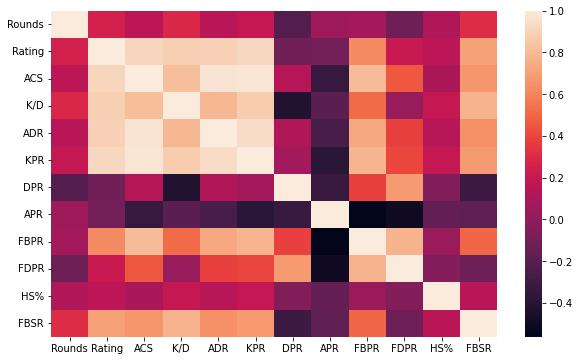

In [54]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr)
plt.show()

There is strong correlation between Rating, ACS, K/D, ADR which is understandable, in fact some of this metrics calculated based on each other. But the most interesting part is that the only column without any correlation is HS% which is counter-intuitive because shot in the head dealing twice as much damage, meaning the ADR, ACS, K/D should go up as HS% go up.

## 4. At what metric each country is good at?/ Which country is the best overall?

In [55]:
player_count = df.groupby('Country')['Player'].count().reset_index()
average = df.groupby('Country')['Rating'].mean().sort_values(ascending=False).head(5)
average

Country
Serbia            1.2600
Paraguay          1.1900
Belarus           1.1825
Czech Republic    1.1800
Portugal          1.1750
Name: Rating, dtype: float64

In [56]:
average = df.groupby('Country')['ACS'].mean().sort_values(ascending=False).head(5)
average

Country
Serbia            254.60
Czech Republic    248.25
Portugal          243.90
Croatia           233.60
Ireland           232.50
Name: ACS, dtype: float64

In [57]:
average = df.groupby('Country')['K/D'].mean().sort_values(ascending=False).head(5)
average

Country
Serbia        1.390
Costa Rica    1.350
Morocco       1.350
Belgium       1.305
Portugal      1.255
Name: K/D, dtype: float64

In [58]:
average = df.groupby('Country')['ADR'].mean().sort_values(ascending=False).head(5)
average

Country
Serbia            161.000
Czech Republic    155.850
Belgium           152.550
Portugal          150.950
Belarus           150.125
Name: ADR, dtype: float64

In [59]:
average = df.groupby('Country')['HS%'].mean().sort_values(ascending=False).head(5)
average

Country
Ukraine                   31.0
China                     31.0
Belgium                   30.5
Bosnia and Herzegovina    29.0
Ireland                   28.0
Name: HS%, dtype: float64

Surpisingly enough country that has top metrics is Serbia that followed by Czech Republic and Portugal. Lets check how many players we have from this countries to have a porper understanding.

In [60]:
top_countries = df.groupby('Country')['Player'].count().reset_index()
print(top_countries[top_countries['Country'] == 'Serbia'])
print(top_countries[top_countries['Country'] == 'Portugal'])
print(top_countries[top_countries['Country'] == 'Czech Republic'])


   Country  Player
34  Serbia       1
     Country  Player
32  Portugal       2
           Country  Player
14  Czech Republic       2


Those countries have too little player in the scene, so this information is irrelevant. Better solution would be find this statistic across countries with 10+ players.

In [61]:
player_count = df.groupby('Country')['Player'].count().sort_values(ascending=False).reset_index()
list_of_countries = set(player_count[player_count['Player'] > 10]['Country'])
avg = df.groupby('Country').mean().reset_index()
relevant_df = pd.DataFrame()
for cnt in list_of_countries:
    relevant_df= pd.concat([avg[avg['Country'] == cnt], relevant_df], ignore_index=True)
relevant_df

,Country,Rounds,Rating,ACS,K/D,ADR,KPR,DPR,APR,FBPR,FDPR,HS%,FBSR
0,Chile,2446.068966,1.062414,215.006897,1.107931,136.920690,0.747931,0.678966,0.278966,0.108276,0.096207,21.758621,51.827586
1,United States,5643.818182,1.077364,214.936364,1.113364,138.014545,0.752545,0.676818,0.271091,0.108455,0.091091,23.809091,54.290909
2,Colombia,1969.454545,1.096818,221.354545,1.157727,140.181818,0.771364,0.669545,0.270455,0.122273,0.098182,22.681818,53.409091
3,Russia,3781.346154,1.098846,219.330769,1.182308,140.326923,0.769231,0.651538,0.258462,0.107692,0.082692,25.153846,56.423077
4,Turkey,3241.693878,1.078367,217.140816,1.118776,139.765306,0.761020,0.682041,0.257959,0.110000,0.095306,25.653061,52.673469
5,South Korea,1661.464789,1.054789,213.919718,1.091408,136.036620,0.741831,0.684366,0.256620,0.111408,0.100423,23.380282,52.126761
6,Canada,6668.194444,1.106389,222.866667,1.158611,141.838889,0.781389,0.675000,0.254722,0.118056,0.091944,23.166667,55.833333
7,United Kingdom,4241.142857,1.047143,204.457143,1.113571,131.514286,0.719286,0.647143,0.280714,0.088571,0.073571,25.071429,54.714286
8,Argentina,2006.941176,1.045882,209.270588,1.116471,133.376471,0.731765,0.657647,0.286471,0.104706,0.088824,23.764706,53.705882
9,Brazil,1918.428571,1.031092,208.292437,1.063193,134.230252,0.726975,0.684118,0.265462,0.105630,0.097563,22.142857,51.453782


In [62]:
relevant_df[['Country', 'Rating']].sort_values(by='Rating', ascending=False).head(5)

,Country,Rating
6,Canada,1.106389
3,Russia,1.098846
2,Colombia,1.096818
4,Turkey,1.078367
1,United States,1.077364


In [63]:
relevant_df[['Country', 'ACS']].sort_values(by='ACS', ascending=False).head(5)

,Country,ACS
6,Canada,222.866667
2,Colombia,221.354545
3,Russia,219.330769
4,Turkey,217.140816
0,Chile,215.006897


In [64]:
relevant_df[['Country', 'K/D']].sort_values(by='K/D', ascending=False).head(5)

,Country,K/D
3,Russia,1.182308
6,Canada,1.158611
2,Colombia,1.157727
4,Turkey,1.118776
8,Argentina,1.116471


Now we got relevant information with a clear top3 which is Canada, Russia and Colombia.

## 5. Who's top 10 performers based on both rating and K/D?

In [65]:
df.sort_values(by=['Rating', 'K/D'], ascending=False).head(10)

,Player,Country,Rounds,Rating,ACS,K/D,ADR,KPR,DPR,APR,FBPR,FDPR,HS%,FBSR
0,Ivy,Colombia,522,1.57,306.4,1.95,192.8,1.10,0.56,0.24,0.22,0.08,35,73
2,cNed,Turkey,5644,1.36,270.3,1.44,162.7,0.96,0.67,0.18,0.19,0.11,24,65
1,mwzera,Brazil,3089,1.36,286.8,1.40,175.2,0.99,0.71,0.24,0.18,0.10,17,65
3,something,Russia,975,1.35,283.2,1.44,175.9,1.00,0.69,0.18,0.19,0.14,22,58
4,Jianna,Armenia,410,1.35,276.7,1.38,182.7,0.91,0.66,0.35,0.15,0.07,18,70
5,GangPin,South Korea,656,1.35,264.0,1.33,164.2,0.91,0.68,0.25,0.19,0.14,25,57
6,Keznit,Chile,2633,1.33,276.6,1.34,169.1,0.95,0.71,0.24,0.19,0.13,23,59
8,trexx,Russia,3245,1.32,260.3,1.45,165.4,0.89,0.62,0.32,0.14,0.09,18,61
7,ScreaM,Belgium,4893,1.32,270.7,1.40,171.8,0.94,0.67,0.23,0.17,0.09,33,66
9,Leo,Sweden,4082,1.32,239.9,1.39,155.7,0.84,0.61,0.33,0.09,0.05,23,67


Lets add amount of rounds played to see how this changing things

In [66]:
df.sort_values(by=['Rounds', 'Rating', 'K/D'], ascending=False).head(10)

,Player,Country,Rounds,Rating,ACS,K/D,ADR,KPR,DPR,APR,FBPR,FDPR,HS%,FBSR
74,Critical,Canada,19824,1.20,230.5,1.18,150.4,0.79,0.67,0.34,0.10,0.08,22,54
228,Jerk,Canada,19258,1.12,223.1,1.13,143.1,0.77,0.68,0.30,0.09,0.08,16,54
266,Governor,United States,16056,1.10,223.7,1.08,143.1,0.77,0.72,0.26,0.14,0.12,23,53
400,jcStani,United States,13982,1.05,205.0,1.03,130.8,0.73,0.70,0.28,0.10,0.08,26,54
207,retrQ,United States,10397,1.13,224.0,1.17,142.3,0.79,0.67,0.26,0.10,0.09,25,53
422,randyySAVAGE,Canada,10130,1.04,208.1,1.08,136.6,0.72,0.67,0.24,0.10,0.08,26,53
401,TURKO,Turkey,9292,1.05,204.7,1.24,137.8,0.75,0.61,0.24,0.07,0.04,28,63
219,mina,United States,9234,1.12,233.3,1.13,144.6,0.81,0.72,0.22,0.16,0.13,22,55
482,StrongLegs,Canada,8805,1.02,193.3,1.03,122.9,0.68,0.66,0.33,0.08,0.08,23,51
222,Nanners,United States,8554,1.12,229.8,1.14,147.5,0.79,0.69,0.26,0.12,0.11,23,52


It changed massively our set. The best solution would be not to add Rounds in the sort but to give it some weight. But we will stop there for now.

## 6. Does HS% and KDR relation follow linear regression?

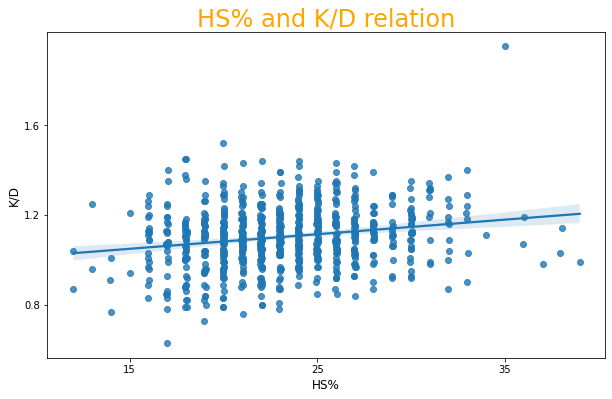

In [67]:
plt.figure(figsize=(10, 6))
sns.regplot(x='HS%', y='K/D', data=df, x_jitter=0.05)
plt.title('HS% and K/D relation', fontsize=24, color='Orange')
plt.ylabel('K/D', fontsize=12, color='Black')
plt.xlabel('HS%', fontsize=12)
plt.yticks([0.8, 1.2, 1.6])
plt.xticks([15, 25, 35])
plt.show()

We can say that relation between this two columns pretty much follows the linear regression model.